In [1]:
!pip install pydicom

In [2]:
import imageio
from skimage.io import imsave
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pydicom import dcmread
from tqdm import tqdm

In [3]:
data_path= 'manifest-1541019095295/TCGA-UCEC'
meta_path = 'manifest-1541019095295/metadata.csv'

In [4]:
D1A0ZO = 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZO/1.3.6.1.4.1.14519.5.2.1.3344.4020.152227609572816929500539247896/1.3.6.1.4.1.14519.5.2.1.3344.4020.107878116597339938470583952492/1-01.dcm'
x = dcmread(D1A0ZO) ###running test patient 
print(x)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.3344.4020.132492876011261829344220396811
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'LOCALIZER', 'CT_SOM5 SPO']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.3344.4020.132492876011261829344220396811
(0008, 0020)

In [5]:
x.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

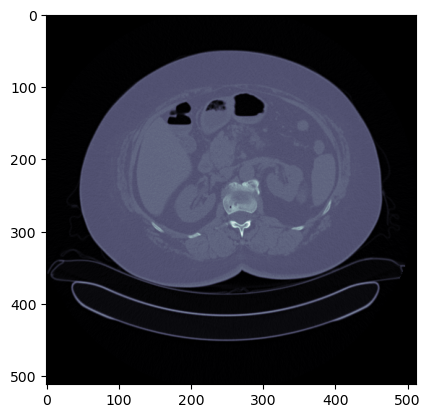

In [6]:
DICOM_file = x
plt.imshow(DICOM_file.pixel_array, cmap=plt.cm.bone)
plt.show()

In [10]:
meta_df = pd.read_csv(meta_path)

In [ ]:
## Investigating meta data to narrow down images and cases to view in this study

In [11]:
#there are 65 patients in this study
meta_df['Subject ID'].value_counts()

TCGA-D1-A169    73
TCGA-D1-A175    46
TCGA-D1-A16D    43
TCGA-D1-A1NX    43
TCGA-D1-A0ZU    40
                ..
TCGA-D1-A15X     2
TCGA-D1-A167     2
TCGA-D1-A168     2
TCGA-D1-A1NU     2
TCGA-D1-A17D     2
Name: Subject ID, Length: 65, dtype: int64

In [12]:
meta_df['Study Description'].value_counts()

CT ABDOMEN w  PELVIS w                            129
Abdomen020APRoutine Adult                          83
NMPETCT trunk                                      54
Thorax040CAPRoutine Adult                          44
Abdomen020AbdomenRoutine Adult                     39
                                                 ... 
CT Abdomen with contrast                            2
CT Pelvis with contrast                             2
CT CHEST W CONTRAST                                 2
CT ABDOMEN w  PELVIS                                2
CT CHEST PULMONARY EMBOLUS PE ABDOMEN PELVIS W      1
Name: Study Description, Length: 84, dtype: int64

In [13]:
meta_df['Series Description'].value_counts()

Topogram  0.6  T20s      65
Topogram  1.0  T20s      45
SCOUT                    41
 NONE                    36
AP Routine  5.0  B40f    29
                         ..
T1 AX                     1
T2AX                      1
SURVEY                    1
T2fsSAG                   1
Recon 3 C-A-P             1
Name: Series Description, Length: 395, dtype: int64

In [14]:
meta_df['Modality'].value_counts()

CT    764
MR    108
PT     37
CR      3
Name: Modality, dtype: int64

In [15]:
MRI_df = meta_df.loc[meta_df['Modality']=='MR']
print(MRI_df['Subject ID'].value_counts())
print(len(pd.unique(MRI_df['Subject ID'])))

TCGA-DI-A2QT    24
TCGA-D1-A0ZU    17
TCGA-D1-A103    14
TCGA-D1-A16D    14
TCGA-D1-A177    13
TCGA-DI-A1NO    12
TCGA-D1-A16N     7
TCGA-DI-A2QY     7
Name: Subject ID, dtype: int64
8


In [31]:
top_series_df = meta_df.loc[meta_df['Series Description']=='Topogram  0.6  T20s']
print(top_series_df['Subject ID'].value_counts())
print(len(pd.unique(top_series_df['Subject ID'])))

TCGA-D1-A169    11
TCGA-D1-A0ZP     6
TCGA-D1-A177     5
TCGA-FI-A2F8     4
TCGA-D1-A16D     4
TCGA-D1-A1NY     3
TCGA-D1-A17K     3
TCGA-D1-A0ZU     3
TCGA-FI-A2D4     2
TCGA-D1-A1O5     2
TCGA-D1-A16I     2
TCGA-D1-A15V     1
TCGA-D1-A1O0     1
TCGA-FI-A2F4     1
TCGA-FI-A2EY     1
TCGA-FI-A2EX     1
TCGA-FI-A2D5     1
TCGA-FI-A2CY     1
TCGA-FI-A2CX     1
TCGA-D1-A2G6     1
TCGA-D1-A0ZQ     1
TCGA-D1-A1NX     1
TCGA-D1-A17U     1
TCGA-D1-A17M     1
TCGA-D1-A0ZV     1
TCGA-D1-A175     1
TCGA-D1-A174     1
TCGA-D1-A16S     1
TCGA-D1-A16Q     1
TCGA-D1-A16N     1
TCGA-D1-A0ZO     1
Name: Subject ID, dtype: int64
31


In [17]:
top_series_df['Study Description'].value_counts()

CT ABDOMEN w  PELVIS w                  33
Abdomen020APRoutine Adult                7
Abdomen020AbdomenPelvisRoutine Adult     6
CT Pelvis with                           4
Thorax040CAPRoutine Adult                3
CT Chest with                            3
Abdomen01APRoutine Adult                 1
CT CHEST W                               1
CT CHEST w  3D Depend WS                 1
Abdomen020AbdomenPelvis Adult            1
Abdomen01AbdomenPelvis Adult             1
CT Pelvis wo                             1
CT Pelvis with contrast                  1
CT Abdomen without con                   1
CT Abd and Pelvis with cont              1
Name: Study Description, dtype: int64

In [33]:
CT_series_df = meta_df.loc[meta_df['Study Description']=='CT ABDOMEN w  PELVIS w']
print(CT_series_df['Subject ID'].value_counts())
print(len(pd.unique(CT_series_df['Subject ID'])))

TCGA-D1-A169    36
TCGA-D1-A0ZP    18
TCGA-D1-A177    17
TCGA-D1-A17K    17
TCGA-D1-A16D    12
TCGA-D1-A0ZU     8
TCGA-D1-A17U     8
TCGA-D1-A1NY     6
TCGA-D1-A16N     3
TCGA-D1-A103     2
TCGA-D1-A2G6     2
Name: Subject ID, dtype: int64
11


In [19]:
top_series_df.loc[top_series_df['Subject ID']=='TCGA-D1-A169']

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
206,1.3.6.1.4.1.14519.5.2.1.3344.4020.224305223766...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149737319611...,CT ABDOMEN w PELVIS w,06-30-1995,SCOUT,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,1,1.63 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:04:57.419
208,1.3.6.1.4.1.14519.5.2.1.3344.4020.212041503401...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149737319611...,CT ABDOMEN w PELVIS w,06-30-1995,Cor AP,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,123,64.84 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:15.9
209,1.3.6.1.4.1.14519.5.2.1.3344.4020.224636763024...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149947771599...,CT ABDOMEN w PELVIS w,01-11-1995,Topogram 0.6 T20s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,1.05 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:17.839
210,1.3.6.1.4.1.14519.5.2.1.3344.4020.173207676460...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149947771599...,CT ABDOMEN w PELVIS w,01-11-1995,AP routine 5.0 B40f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,96,50.61 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:21.036
211,1.3.6.1.4.1.14519.5.2.1.3344.4020.281731039123...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149737319611...,CT ABDOMEN w PELVIS w,06-30-1995,AP,GE MEDICAL SYSTEMS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,95,50.26 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:26.548
212,1.3.6.1.4.1.14519.5.2.1.3344.4020.313032091124...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.195289762434...,CT ABDOMEN w PELVIS w,09-04-1994,Topogram 0.6 T20s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,1.05 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:27.996
213,1.3.6.1.4.1.14519.5.2.1.3344.4020.130733019110...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.195289762434...,CT ABDOMEN w PELVIS w,09-04-1994,Cor AP 3.0 B40f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,98,67.49 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:42.106
214,1.3.6.1.4.1.14519.5.2.1.3344.4020.989445640956...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.149947771599...,CT ABDOMEN w PELVIS w,01-11-1995,Cor AP routine 3.0 B40f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,116,66.22 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:42.575
215,1.3.6.1.4.1.14519.5.2.1.3344.4020.181381941073...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.215388744475...,CT ABDOMEN w PELVIS w,05-19-1995,Topogram 0.6 T20s,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,2,357.27 KB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:43.494
216,1.3.6.1.4.1.14519.5.2.1.3344.4020.786156535390...,TCGA-UCEC,NaN,https://doi.org/10.7937/K9/TCIA.2016.GKJ0ZWAC,TCGA-D1-A169,1.3.6.1.4.1.14519.5.2.1.3344.4020.195289762434...,CT ABDOMEN w PELVIS w,09-04-1994,AP Routine 5.0 B40f,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,103,54.30 MB,.\TCGA-UCEC\TCGA-D1-A169\1.3.6.1.4.1.14519.5.2...,2023-05-23T12:05:55.928


In [42]:
unique_paths = pd.unique(top_series_df['File Location'])
len(np.unique(unique_paths))
print(unique_paths)

['.\\TCGA-UCEC\\TCGA-D1-A0ZO\\1.3.6.1.4.1.14519.5.2.1.3344.4020.179228879261017347978599231608\\1.3.6.1.4.1.14519.5.2.1.3344.4020.171394567395367917570676104282'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP\\1.3.6.1.4.1.14519.5.2.1.3344.4020.159356635199549604242854110904\\1.3.6.1.4.1.14519.5.2.1.3344.4020.332182095817349053075264159576'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP\\1.3.6.1.4.1.14519.5.2.1.3344.4020.249061802535556703634002145688\\1.3.6.1.4.1.14519.5.2.1.3344.4020.208495996480983981282820568652'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP\\1.3.6.1.4.1.14519.5.2.1.3344.4020.313041570718324356965136992825\\1.3.6.1.4.1.14519.5.2.1.3344.4020.155515926207162388261145916543'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP\\1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024157349250872\\1.3.6.1.4.1.14519.5.2.1.3344.4020.204790283469333921424112888259'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP\\1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024157349250872\\1.3.6.1.4.1.14519.5.2.1.3344.4020.591558085599452559637237498420'
 '.\\TCGA-UCEC\\TCGA-D1-A0ZP

In [44]:
unique_paths = [u.replace('\\', '/') for u in unique_paths]
unique_paths

['./TCGA-UCEC/TCGA-D1-A0ZO/1.3.6.1.4.1.14519.5.2.1.3344.4020.179228879261017347978599231608/1.3.6.1.4.1.14519.5.2.1.3344.4020.171394567395367917570676104282',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.159356635199549604242854110904/1.3.6.1.4.1.14519.5.2.1.3344.4020.332182095817349053075264159576',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.249061802535556703634002145688/1.3.6.1.4.1.14519.5.2.1.3344.4020.208495996480983981282820568652',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.313041570718324356965136992825/1.3.6.1.4.1.14519.5.2.1.3344.4020.155515926207162388261145916543',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024157349250872/1.3.6.1.4.1.14519.5.2.1.3344.4020.204790283469333921424112888259',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024157349250872/1.3.6.1.4.1.14519.5.2.1.3344.4020.591558085599452559637237498420',
 './TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5

In [55]:
unique_paths = [u.replace('./', 'manifest-1541019095295/') for u in unique_paths]
unique_paths

['manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZO/1.3.6.1.4.1.14519.5.2.1.3344.4020.179228879261017347978599231608/1.3.6.1.4.1.14519.5.2.1.3344.4020.171394567395367917570676104282',
 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.159356635199549604242854110904/1.3.6.1.4.1.14519.5.2.1.3344.4020.332182095817349053075264159576',
 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.249061802535556703634002145688/1.3.6.1.4.1.14519.5.2.1.3344.4020.208495996480983981282820568652',
 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.313041570718324356965136992825/1.3.6.1.4.1.14519.5.2.1.3344.4020.155515926207162388261145916543',
 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024157349250872/1.3.6.1.4.1.14519.5.2.1.3344.4020.204790283469333921424112888259',
 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZP/1.3.6.1.4.1.14519.5.2.1.3344.4020.327435405160690024

In [51]:
#open source code https://www.kaggle.com/code/gzuidhof/full-preprocessing-tutorial/notebook
def load_scan(path):
    slices = [dcmread(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices


In [53]:
path_pt1 = 'manifest-1541019095295/TCGA-UCEC/TCGA-D1-A0ZO/1.3.6.1.4.1.14519.5.2.1.3344.4020.179228879261017347978599231608/1.3.6.1.4.1.14519.5.2.1.3344.4020.171394567395367917570676104282'
patient1 = load_scan(path_pt1)
print(patient1)

[Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.3344.4020.132789120395065569786393167520
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'LOCALIZER', 'CT_SOM5 TOP', 'CSA RESAMPLED']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.3344.4020.13278912039506556978639

In [22]:
#loop over all the pixels
pixels_df = []
for files in patient1:
    pixels_np = files.pixel_array
    pixels_df.append(pixels_np)
print(pixels_df)   

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 

In [29]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

patient1_pixels= get_pixels_hu(patient1)

print(patient1_pixels)

[[[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 ...

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -10

NameError: name 'vol' is not defined

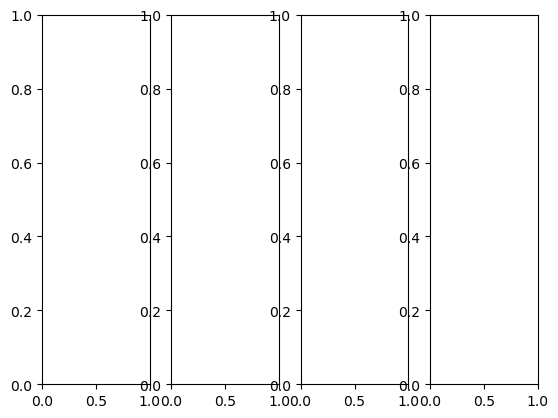

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vo20+l[ii*40,:,:]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

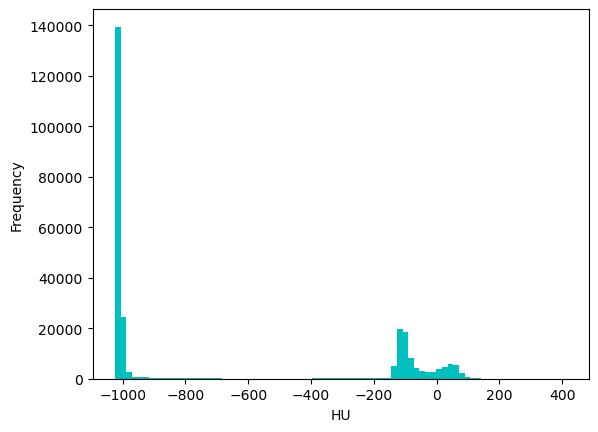

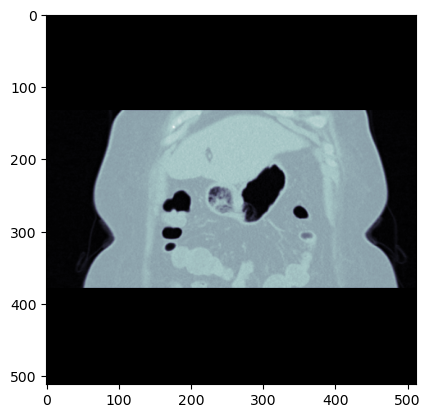

In [36]:
plt.hist(patient1_pixels[20].flatten(),bins=80,color='c')
plt.xlabel('HU')
plt.ylabel('Frequency')
plt.show()

plt.imshow(patient1_pixels[20],cmap=plt.cm.bone)
plt.show()

In [24]:
import tarfile
  
# open file
file = tarfile.open('gdc_download_biomedical_ucec.tar.gz')
  
# extracting file
file.extractall('./gdc_data')

In [25]:
gdc_path = './gdc_data'
gdc_files = os.listdir(gdc_path)
print(gdc_files)

['3eefa637-ec64-42fa-8d0d-c740de106669', '43311b81-8006-4b7b-88a2-a5a1252e12ee', '508088eb-2758-4f01-b27a-612d4c1f5e08', '79a1acba-c628-45cf-8abf-acc73ae5cdf5', '98e6a925-08fc-4b3b-a808-205029dadc2f', 'b850c7fd-47dc-48ab-a679-4e5a304e2822', 'b8dd2691-f7fd-4d2d-a291-416dbfaa3ebe', 'd1341b4c-0282-421f-acf4-d56c2c85d999', 'd2e2c74f-93f7-4d9b-9cf1-f6401b1ec297', 'd7682a00-7e5f-4fc9-ae74-cc0e1c15fd20', 'f1abee77-e640-4b4c-a5fe-e3490db3f379', 'MANIFEST.txt']


In [26]:
from os import walk

gdc = []
for (dirpath, dirnames, filenames) in walk(gdc_path):
    gdc.extend(filenames)

In [27]:
print(gdc)

['MANIFEST.txt', 'nationwidechildrens.org_biospecimen_diagnostic_slides_ucec.txt', 'nationwidechildrens.org_biospecimen_shipment_portion_ucec.txt', 'nationwidechildrens.org_biospecimen_portion_ucec.txt', 'nationwidechildrens.org_biospecimen_slide_ucec.txt', 'nationwidechildrens.org_ssf_tumor_samples_ucec.txt', 'nationwidechildrens.org_biospecimen_aliquot_ucec.txt', 'nationwidechildrens.org_biospecimen_sample_ucec.txt', 'nationwidechildrens.org_auxiliary_ucec.txt', 'nationwidechildrens.org_biospecimen_analyte_ucec.txt', 'nationwidechildrens.org_biospecimen_protocol_ucec.txt', 'nationwidechildrens.org_ssf_normal_controls_ucec.txt']
